In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

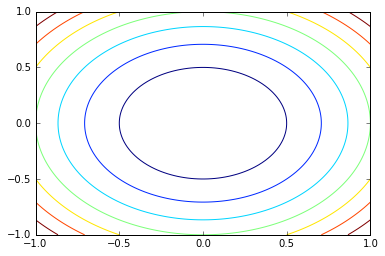

In [35]:
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)
Z = x**2 + y**2
plt.contour(x,y,Z)

### Função, gradiente e hessiana

* $f(x)$ - função a ser minimizada
* $\nabla f(x)$ - gradiente de $f(x)$
* $\nabla^2 f(x)$ - hessiana de $f(x)$

In [ ]:
def func(x0):
    x1, x2 = x0
    return(10*x1**4 - x2*20*x1**2 +\
           10*x2**2 + x1**2 -2*x1 + 5)

def grad(x0):
    x1, x2 = x0
    return()